### Project 2
Refer to the project writeup [here](https://rutgers.box.com/s/yqrov1mwv5kbpk557nvc5uhjbj4mla6d)

In [ ]:
from math import exp
import random

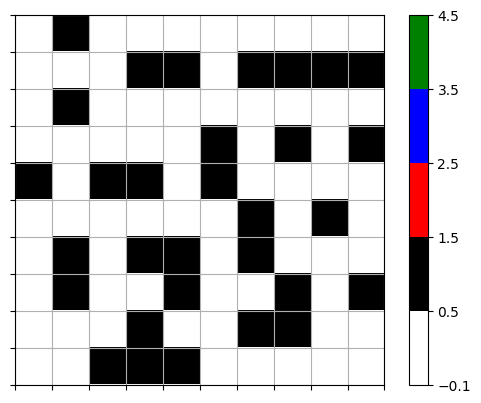

In [6]:
from ship import ship

# Confirming our import works
space_ship = ship.CreateShip(10)
space_ship.OpenShip()
space_ship.ShowShip()

In [ ]:
# Now I want to work on bot 3
# Bot 3 and leak have random location on open cells
# If bot takes a "sense" action it has p = e^(-a(d-1)) of getting a beep, given leak is d steps away

# d(i, j) is shortest path to (i, j), all we need to do is SSSP with BFS
def SSSP(ship2: ship, src: tuple):
    dist = {cell :  float('inf') for cell in ship2.open}
    dist[src] = 0
    fringe = [src]
    while fringe:
        curr = fringe.pop(0)
        currDist = dist[curr]
        for adj in ship2.getAdj(curr):
            new_dist = 1 + currDist
            if new_dist < dist[adj]:
                dist[adj] = new_dist
                fringe.append(adj)
    return dist


# Initially all open cells should have the same probability of containing a leak
# What is P(leak is nearby | beep) = P(beep | leak)*P(leak) / P(beep)

def sense(botloc, leakloc, alpha, ship2): #Assuming botloc and leakloc are tuples (row, col)
    dist = SSSP(ship2, botloc)
    d = dist[leakloc]
    prob = exp(-alpha*(d-1))
    if random.random() < prob:
        return True, prob
    return False, prob

# To determine the next cell we visit:
# - Determine Max P(leak in cell x)
# Put all cells with this probability into a list
# Go to the closest one from this list

def updateProbs(currProbs, senseRes, ship, dist, alpha, probs):
    if senseRes:
        # Find P(beep)
        denom = sum(probs[k] * exp(-alpha*(dist[k]-1)) for k in ship.open)
    else:
        # Find P(!beep)
        denom = sum(probs[k] * (1 - exp(-alpha*(dist[k]-1))) for k in ship.open)
    for cell in ship.open:
        if senseRes:
            p_data_evidence = exp(-alpha * (dist[cell]-1))
        else:
            p_data_evidence = 1-exp(-alpha * (dist[cell]-1))
        # Essentially, if we get a beep: P(leak in cell)* P(beep at i | leak in cell)/ P(beep)
        new_prob = (probs[cell]*p_data_evidence)/denom 
        probs[cell] = new_prob
    return probs
        
    